In [129]:
import numpy as np  
from autograd import grad
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 80
from matplotlib import ticker, cm


#mx.random.seed(1)
random.seed(1)

# Linear regression.
def net(X, w):
    return np.dot(X, w)

# Loss function.
def square_loss(yhat, y):
    return (yhat - y) ** 2 / 2

# Gradient funtion
def loss_grad(X, w, y):
    X_1 = X[:,[0]]
    X_2 = X[:,[1]]
    temp = X.dot(w)-y
    dldm = np.dot(X_1.T , temp)  
    dldb = np.dot(X_2.T , temp)  

    return np.concatenate((dldm, dldb), axis = 0)


# Mini-batch stochastic gradient descent.
def sgd(gradient, lr, batch_size):
    #print(gradient)
    return  np.multiply(lr, gradient)/batch_size 


class timeit():
    from datetime import datetime
    def __enter__(self):
        self.tic = self.datetime.now()
    def __exit__(self, *args, **kwargs):
        temporal = self.datetime.now() - self.tic
        print('runtime (s): ' ,temporal.total_seconds())

class OptiObj:
    def __init__(self , num_inputs, num_examples, true_w):
    
        # Generate data.
        self.num_inputs = num_inputs # Including the dim of bias
        self.num_examples = 100
        #true_w = [2, 2]
        self.true_w = np.reshape(true_w, (num_inputs, 1))
        self.X_0 = np.random.normal(scale=1, size=(num_examples, num_inputs-1))
        self.X = np.c_[self.X_0,np.ones((len(self.X_0), 1))]  # Including the bias 1
        self.y = np.dot(self.X,self.true_w)
        self.y += .1 * np.random.normal(scale=1, size=self.y.shape)
        plt.plot(self.X[:,0],self.y, '*')
        #Plot line
        x_lin = np.arange(-4, 4, 0.2)
        x_lin = np.c_[x_lin,np.ones((len(x_lin), 1))] 
        y_lin = net(x_lin, np.reshape(self.true_w, (2, 1)))
        plt.plot(x_lin[:,0], y_lin)
        
    def Loos_alt(self, m ,b):
        suma = 0
        for i, term in enumerate(self.X_0):
            suma += (term*m +b -self.y[i])**2

        return 0.5*suma/len(self.y)


    # Construct data iterator.
    def data_iter(self, batch_size):
        idx = list(range(self.num_examples))
        random.shuffle(idx)
        for batch_i, i in enumerate(range(0, self.num_examples, batch_size)):
            j = np.array(idx[i: min(i + batch_size, self.num_examples)])
            yield batch_i, self.X[j], self.y[j]

    # Initialize model parameters.
    def init_params(self, w):
        self.w = np.reshape(w, (num_inputs, 1))
        

    def train(self, batch_size, lr, epochs, period, app = 'SG', verb = 'N'):
        assert period >= batch_size and period % batch_size == 0


        loss_true = np.mean(square_loss(net(self.X, self.true_w), self.y))
        total_loss = [np.mean(square_loss(net(self.X, self.w), self.y))]
        accesOfData = []
        accesOfData_counter = 0
        w_log = []

        # Epoch starts from 1.
        with timeit():
            for epoch in range(1, epochs + 1):
                # Decay learning rate.
                if epoch > 2:
                    lr *= 0.9999
                for batch_i, data, label in self.data_iter(batch_size):
                        accesOfData_counter +=  batch_size
                        gradient = loss_grad(data, self.w, label)
                        w_log.append(self.w)
                        self.w = self.w - sgd(gradient, lr, batch_size)
                        if batch_i * batch_size % period == 0:
                            total_loss.append(
                                np.mean(square_loss(net(self.X, self.w), self.y)))
                            accesOfData.append(accesOfData_counter)
                if verb == 'Y':            
                    print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e , AccsesData num %d" %
                          (batch_size, lr, epoch, total_loss[-1], accesOfData_counter))


        #print('Loss: ', total_loss[-1] )
        #print('w:', np.reshape(w, (1, -1)), '\n')
        print('Relative error: %.2f   %%'  %
              (100*np.abs(total_loss[-1]-loss_true)/loss_true ))
        x_axis = np.linspace(0, epochs, len(accesOfData), endpoint=True)

        # Initialise the subplot function using number of rows and columns
        figure, axis = plt.subplots(1, 2)
        # For Sine Function
        axis[0].semilogy(accesOfData, total_loss[:-1])
        axis[0].set_title("Data Acces")
        #plt.semilogy(x_axis, total_loss)
        #ax0.semilogy(accesOfData, total_loss[:-1])

        feature_x = np.arange(0, 4, 0.04)
        feature_y = np.arange(0, 4, 0.04)

        # Creating 2-D grid of features
        [Xm, Ym] = np.meshgrid(feature_x, feature_y)

        Z = self.Loos_alt(Xm ,Ym)
        # plots contour lines
        cs = axis[1].contourf(Xm, Ym, Z,locator=ticker.LogLocator(), cmap=cm.PuBu_r )

        if app == 'SG':
            axis[1].set_title("Stochastic Gradient")
        elif app == 'BG':
            axis[1].set_title(str(batch_size)+"-Batch Gradient")
        else:
            axis[1].set_title("Gradient Descendent")
        axis[1].plot(np.array(w_log)[:,0,0],np.array(w_log)[:,1,0],c='r')

        cbar = figure.colorbar(cs)
        plt.show()




# Fix parameters:
## Number of imputs = 2, slope and intersect
## w_0 = (0,0)
## w_true = (2,2)
## batch_size = Number of imputs/10  // For mini-batch experiments

In [130]:
num_inputs = 2 # Including the dim of bias
true_w = [2, 2]
w = np.array([[0],[0]])
#w = np.random.normal(scale=1, size=(num_inputs, 1))
print('Initial value of the parameter \n',w)



Initial value of the parameter 
 [[0]
 [0]]


## Variation of the fix stepsize
### alpha = 0.5

### Same number of examples = 100


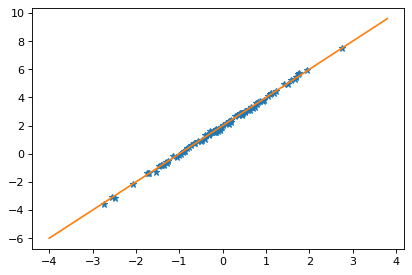

In [131]:
num_examples = 100
a = OptiObj(num_inputs, num_examples, true_w)

# Fix Step size
## alpha = 0.4

runtime (s):  0.187001
Relative error: 6.66   %


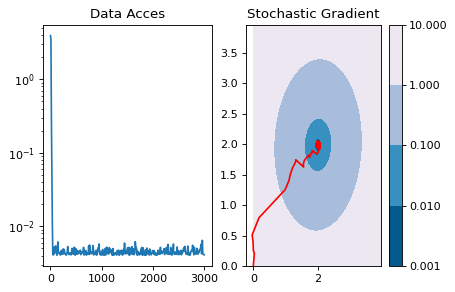

runtime (s):  0.016999
Relative error: 0.54   %


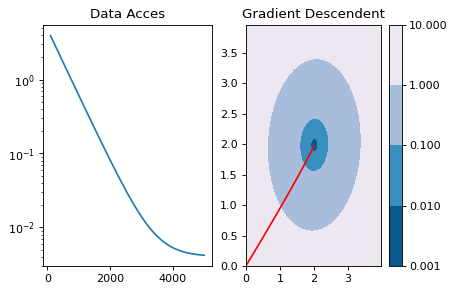

runtime (s):  0.031006
Relative error: 2.03   %


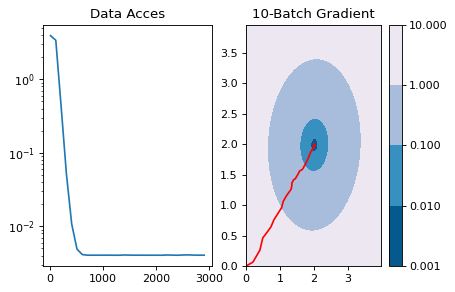

In [135]:
a.init_params(w)
a.train(batch_size=1, lr=0.1, epochs=30, period=9)
a.init_params(w)
a.train(batch_size=num_examples, lr=0.1, epochs=50, period=num_examples,  app = 'GD')
a.init_params(w)
a.train(batch_size=10, lr=0.1, epochs=30, period=120,  app = 'BG')

# Fix Step size
## alpha = 0.04